# Ранее мы рисовали распределение, группируя значения с помощью Pandas. Было бы здорово, если бы мы могли нарисовать его более автоматическим способом.
# Но нам придется использовать другой тип визуализации – гистограммы. На этот раз мы не будем использовать средние значения. Мы будем использовать абсолютные числа коммитов и сравним их в рабочие и выходные дни.

In [5]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


conn = sqlite3.connect('../data/checking-logs.sqlite')

In [6]:
commits_query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%';
"""
commits_df = pd.read_sql_query(commits_query, conn)

# Преобразование столбца timestamp в формат datetime
commits_df['timestamp'] = pd.to_datetime(commits_df['timestamp'])

In [7]:
# Добавление столбца с часом
commits_df['hour'] = commits_df['timestamp'].dt.hour\

# Добавление столбца с днем недели
commits_df['day_of_week'] = commits_df['timestamp'].dt.day_name()

# Разделение данных на рабочие и выходные дни
workdays = commits_df[commits_df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = commits_df[commits_df['day_of_week'].isin(['Saturday', 'Sunday'])]

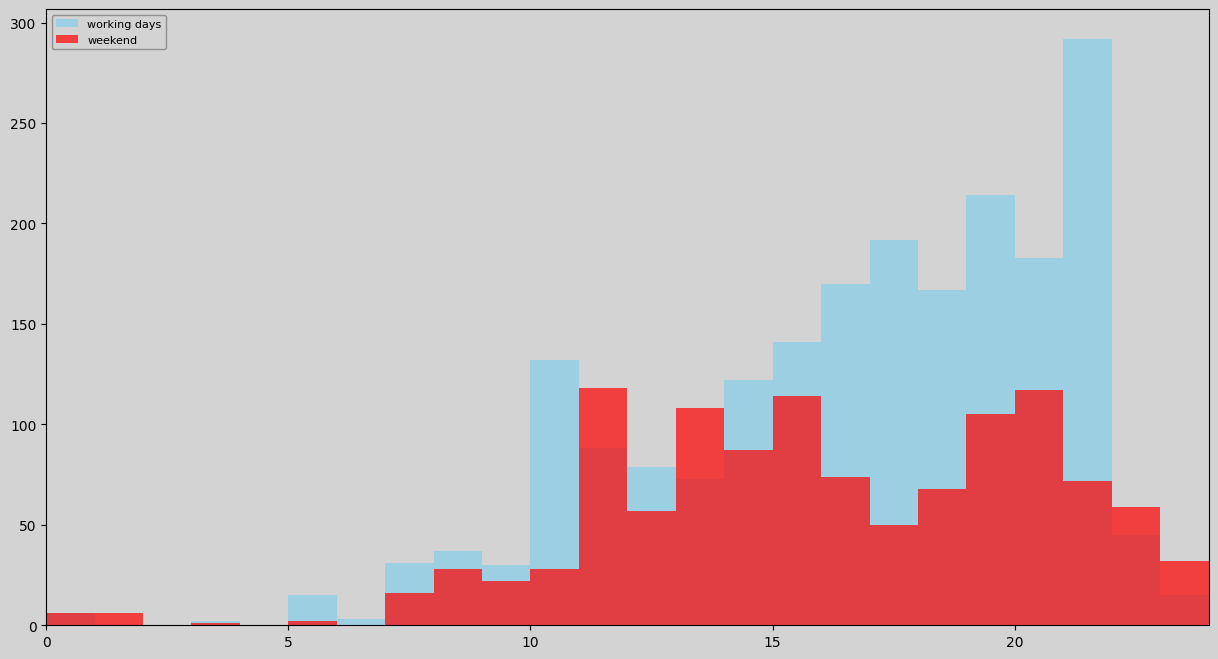

In [8]:
# Группировка данных по часу и подсчет количества коммитов
workdays_counts = workdays.groupby('hour').size().reindex(range(24), fill_value=0).reset_index(name='counts')
weekends_counts = weekends.groupby('hour').size().reindex(range(24), fill_value=0).reset_index(name='counts')

# Построение гистограммы
plt.figure(figsize=(15, 8))

# Определение диапазона для оси X (часы)
hours = range(24)

# Построение гистограммы
plt.bar(workdays_counts['hour'], workdays_counts['counts'], alpha=0.7, label='working days', color='skyblue', width=1, align='edge')
plt.bar(weekends_counts['hour'], weekends_counts['counts'], alpha=0.7, label='weekend', color='red', width=1, align='edge')
plt.gcf().set_facecolor('lightgray')
plt.gca().set_facecolor('lightgray')

# Добавление легенды
plt.legend(loc='upper left', fontsize=8, facecolor='lightgrey', edgecolor='grey')
# Удаление отступов от краев
plt.xlim(0, 24)


# Показ графика
plt.show()

In [13]:
len(weekends)

1170

In [10]:
# Объединение данных для сравнения
comparison_df = pd.merge(workdays_counts, weekends_counts, on='hour', suffixes=('_workdays', '_weekends'))

# Нахождение часов, когда количество коммитов в выходные дни было выше, чем в рабочие дни
comparison_df['difference'] = comparison_df['counts_weekends'] - comparison_df['counts_workdays']
best_examples = comparison_df[comparison_df['difference'] > 0].nlargest(4, 'difference').sort_values(by ='hour')

# Вывод результатов
print(f"Часы, когда количество коммитов в выходные дни было выше, чем в рабочие дни: \n{best_examples['hour'].tolist()}")

Часы, когда количество коммитов в выходные дни было выше, чем в рабочие дни: 
[11, 13, 22, 23]


In [11]:
conn.close()